<a href="https://colab.research.google.com/github/Pranav24112004/ML_HCT/blob/main/DBSCAN_and_KMEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/new_df.csv')

In [ ]:
df.head()

,sex_match_M-F,peptic_ulcer,prim_disease_hct_MDS,prim_disease_hct_IEA,cmv_status_-/+,rheum_issue,ethnicity_Non-resident of the U.S.,year_hct,"melphalan_dose_N/A, Mel not given",conditioning_intensity_RIC,...,tce_div_match_Permissive mismatched,"tbi_status_TBI +- Other, <=cGy",prod_type_PB,tce_imm_match_Missing,age_at_hct,tce_imm_match_P/P,hepatic_severe,karnofsky_score,cmv_status_-/-,efs_time
0,True,1,False,True,False,1,False,2016,True,False,...,False,False,False,True,1.0,False,1,6.0,False,42.356
1,False,1,False,False,False,1,False,2008,True,False,...,True,False,True,False,3.0,True,1,6.0,False,4.672
2,False,1,False,False,False,1,False,2019,True,False,...,True,False,False,False,3.0,True,1,6.0,False,19.793
3,False,1,False,False,False,1,False,2009,True,False,...,True,False,False,False,3.0,True,1,6.0,False,102.349
4,True,1,False,False,False,1,False,2018,False,False,...,True,False,True,True,3.0,False,1,6.0,False,16.223


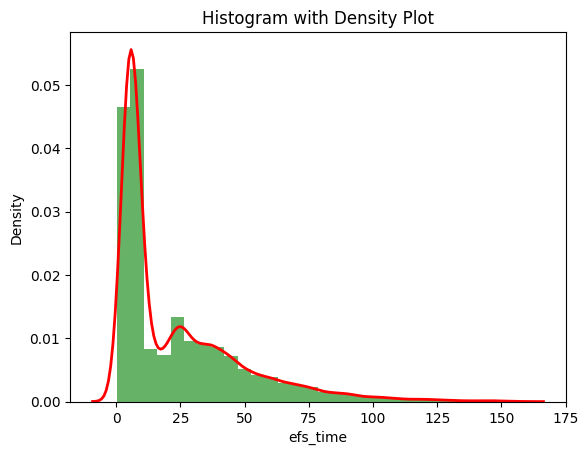

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['efs_time'], bins=30, density=True, alpha=0.6, color='g')
sns.kdeplot(df['efs_time'], color='red', linewidth=2)  # Overlay kernel density estimate
plt.title("Histogram with Density Plot")
plt.show()

In [ ]:
from scipy.stats import iqr
import numpy as np
import pandas as pd

# Assume df is your DataFrame
data = df['efs_time']

# Compute Freedman-Diaconis bin width
bin_width = 2 * iqr(data) / (len(data) ** (1/3))

# Prevent zero or negative bin width
if bin_width == 0:
    bin_width = (max(data) - min(data)) / 10  # Fallback: Divide range into 10 bins

# Define bins
bins = np.arange(min(data), max(data) + bin_width, bin_width)

# Apply binning
df['binned'] = pd.cut(df['efs_time'], bins=bins)

# Print bin summary
print(df['binned'].value_counts())

binned
(4.18, 6.104]         5526
(6.104, 8.027]        4134
(2.257, 4.18]         2751
(8.027, 9.951]        1675
(23.415, 25.339]       816
                      ... 
(136.903, 138.827]       5
(152.291, 154.215]       3
(154.215, 156.138]       3
(150.368, 152.291]       2
(156.138, 158.062]       1
Name: count, Length: 82, dtype: int64


In [ ]:
df.head()

,sex_match_M-F,peptic_ulcer,prim_disease_hct_MDS,prim_disease_hct_IEA,cmv_status_-/+,rheum_issue,ethnicity_Non-resident of the U.S.,year_hct,"melphalan_dose_N/A, Mel not given",conditioning_intensity_RIC,...,"tbi_status_TBI +- Other, <=cGy",prod_type_PB,tce_imm_match_Missing,age_at_hct,tce_imm_match_P/P,hepatic_severe,karnofsky_score,cmv_status_-/-,efs_time,binned
0,True,1,False,True,False,1,False,2016,True,False,...,False,False,True,1.0,False,1,6.0,False,42.356,"(40.727, 42.65]"
1,False,1,False,False,False,1,False,2008,True,False,...,False,True,False,3.0,True,1,6.0,False,4.672,"(4.18, 6.104]"
2,False,1,False,False,False,1,False,2019,True,False,...,False,False,False,3.0,True,1,6.0,False,19.793,"(19.568, 21.492]"
3,False,1,False,False,False,1,False,2009,True,False,...,False,False,False,3.0,True,1,6.0,False,102.349,"(102.28, 104.203]"
4,True,1,False,False,False,1,False,2018,False,False,...,False,True,True,3.0,False,1,6.0,False,16.223,"(15.721, 17.645]"


In [ ]:
df = df.drop(columns=['efs_time'])

In [ ]:
df.head()

,sex_match_M-F,peptic_ulcer,prim_disease_hct_MDS,prim_disease_hct_IEA,cmv_status_-/+,rheum_issue,ethnicity_Non-resident of the U.S.,year_hct,"melphalan_dose_N/A, Mel not given",conditioning_intensity_RIC,...,tce_div_match_Permissive mismatched,"tbi_status_TBI +- Other, <=cGy",prod_type_PB,tce_imm_match_Missing,age_at_hct,tce_imm_match_P/P,hepatic_severe,karnofsky_score,cmv_status_-/-,binned
0,True,1,False,True,False,1,False,2016,True,False,...,False,False,False,True,1.0,False,1,6.0,False,"(40.727, 42.65]"
1,False,1,False,False,False,1,False,2008,True,False,...,True,False,True,False,3.0,True,1,6.0,False,"(4.18, 6.104]"
2,False,1,False,False,False,1,False,2019,True,False,...,True,False,False,False,3.0,True,1,6.0,False,"(19.568, 21.492]"
3,False,1,False,False,False,1,False,2009,True,False,...,True,False,False,False,3.0,True,1,6.0,False,"(102.28, 104.203]"
4,True,1,False,False,False,1,False,2018,False,False,...,True,False,True,True,3.0,False,1,6.0,False,"(15.721, 17.645]"


In [ ]:
df.to_csv("filename.csv", index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop the 'binned' column (it's the output)
X = df.drop(columns=['binned'])

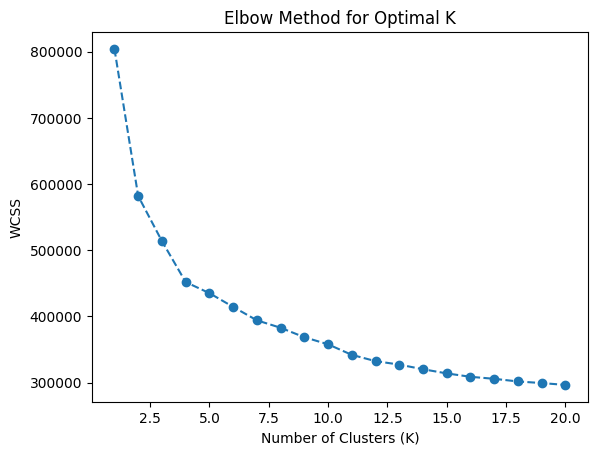

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of K
wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 21)  # Test K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Save WCSS for each K

# Plot Elbow Curve
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
!pip install kneed
from kneed import KneeLocator
knee_locator = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 4


In [ ]:
from sklearn.metrics import silhouette_score

# Apply K-Means with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

# Compute Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score}")

Silhouette Score for K=4: 0.19347323281165396


In [ ]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)  # Assign cluster labels

# Display first few rows with clusters
print(df[['binned', 'Cluster']].head())

              binned  Cluster
0    (40.727, 42.65]        3
1      (4.18, 6.104]        0
2   (19.568, 21.492]        3
3  (102.28, 104.203]        0
4   (15.721, 17.645]        3


In [ ]:
df.groupby('Cluster')['binned'].value_counts()

Cluster  binned            
0        (4.18, 6.104]         1084
         (6.104, 8.027]         989
         (2.257, 4.18]          716
         (8.027, 9.951]         633
         (9.951, 11.874]        299
                               ... 
3        (146.521, 148.444]       0
         (150.368, 152.291]       0
         (152.291, 154.215]       0
         (154.215, 156.138]       0
         (156.138, 158.062]       0
Name: count, Length: 328, dtype: int64

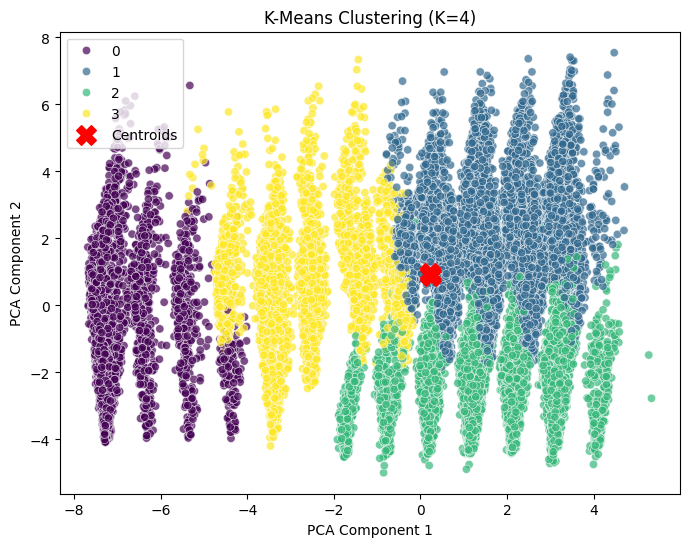

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop the target column 'binned'
X = df.drop(columns=['binned'])

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Choose the best K (Change this based on your Elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)  # Assign cluster labels

# Extract PCA components for plotting
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.legend()
plt.show()

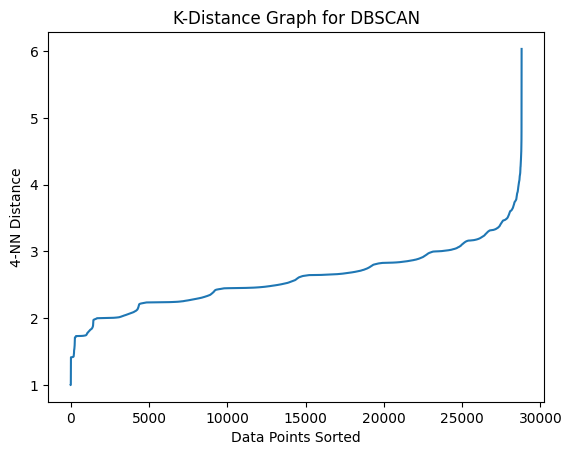

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Scale the features
X = df.drop(columns=['binned'])  # Remove target variable

# Find the optimal epsilon using the K-Distance Graph
neighbors = NearestNeighbors(n_neighbors=5)  # 5 nearest neighbors
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances and plot
distances = np.sort(distances[:, 4])  # 4th neighbor distance
plt.plot(distances)
plt.xlabel("Data Points Sorted")
plt.ylabel("4-NN Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

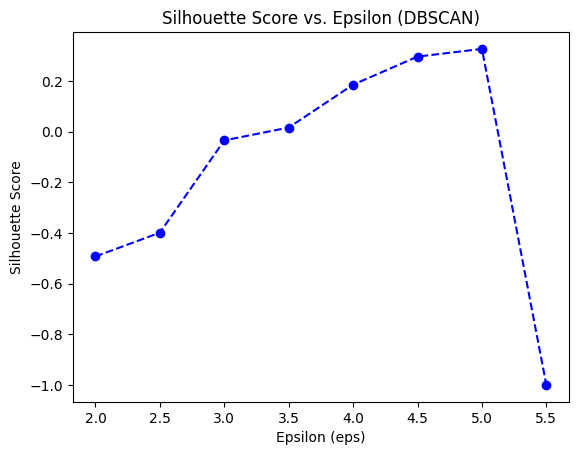

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_values = np.arange(2, 6, 0.5)  # Test different `eps` values
sil_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)  # Keep min_samples fixed
    clusters = dbscan.fit_predict(X)

    # Only compute Silhouette Score if more than 1 cluster is found
    if len(set(clusters)) > 1:
        sil_scores.append(silhouette_score(X, clusters))
    else:
        sil_scores.append(-1)  # Invalid score if all points in one cluster

# Plot the results
plt.plot(eps_values, sil_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Epsilon (DBSCAN)")
plt.show()

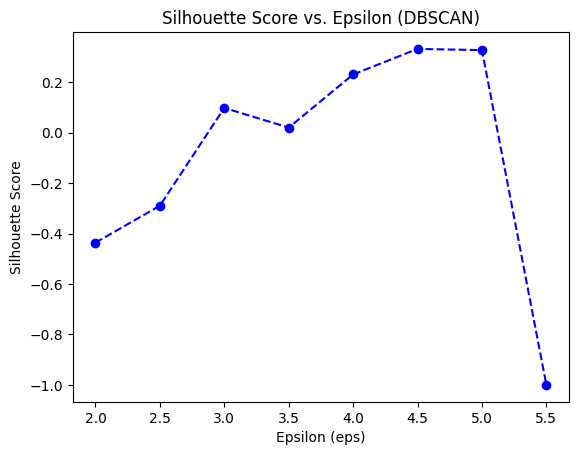

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_values = np.arange(2, 6, 0.5)  # Test different `eps` values
sil_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=10)  # Keep min_samples fixed
    clusters = dbscan.fit_predict(X)

    # Only compute Silhouette Score if more than 1 cluster is found
    if len(set(clusters)) > 1:
        sil_scores.append(silhouette_score(X, clusters))
    else:
        sil_scores.append(-1)  # Invalid score if all points in one cluster

# Plot the results
plt.plot(eps_values, sil_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Epsilon (DBSCAN)")
plt.show()

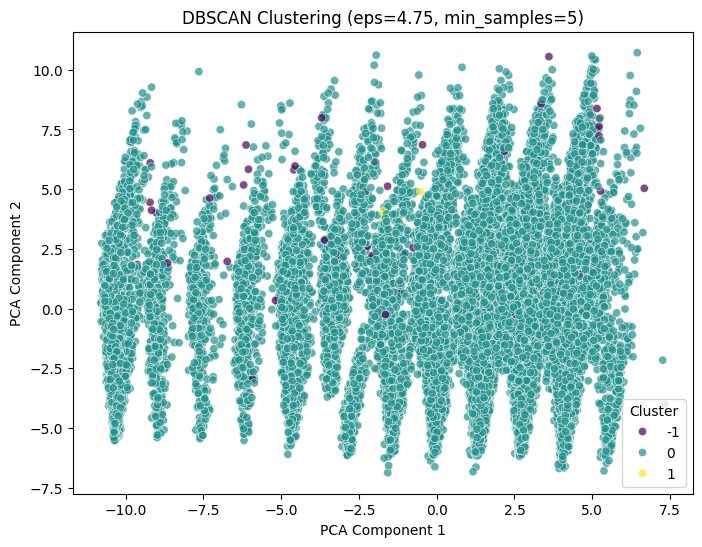

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot DBSCAN Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"DBSCAN Clustering (eps={4.75}, min_samples={5})")
plt.legend(title="Cluster")
plt.show()

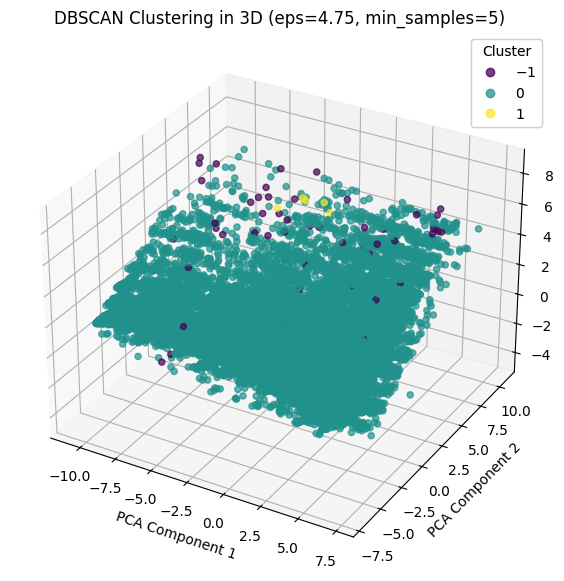

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]

# Plot DBSCAN Clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster'], cmap='viridis', alpha=0.7)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title(f"DBSCAN Clustering in 3D (eps={4.75}, min_samples={5})")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'X' is your features dataframe
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust 'n_clusters' based on Elbow Method
df['KMeans_Cluster'] = kmeans.fit_predict(X)  # Assign cluster labels

In [ ]:
from sklearn.cluster import DBSCAN

# Assuming 'X' is your features dataframe
dbscan = DBSCAN(eps=4.75, min_samples=5)  # Adjust parameters as needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)  # Assign cluster labels

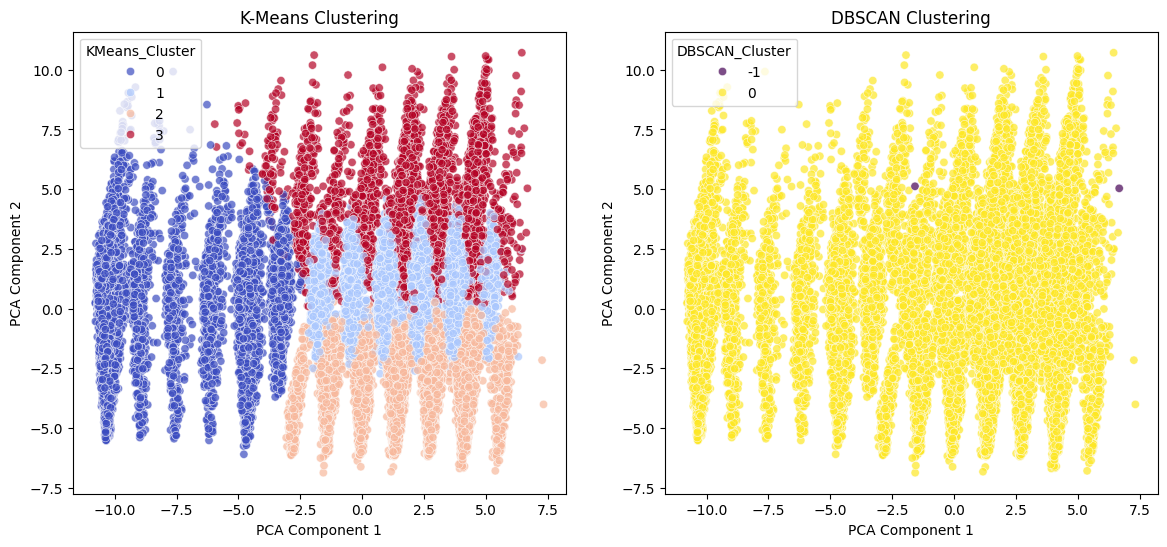

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot K-Means Clusters
sns.scatterplot(ax=ax[0], x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='coolwarm', alpha=0.7)
ax[0].set_title("K-Means Clustering")
ax[0].set_xlabel("PCA Component 1")
ax[0].set_ylabel("PCA Component 2")

# Plot DBSCAN Clusters
sns.scatterplot(ax=ax[1], x=df['PCA1'], y=df['PCA2'], hue=df['DBSCAN_Cluster'], palette='viridis', alpha=0.7)
ax[1].set_title("DBSCAN Clustering")
ax[1].set_xlabel("PCA Component 1")
ax[1].set_ylabel("PCA Component 2")

plt.show()

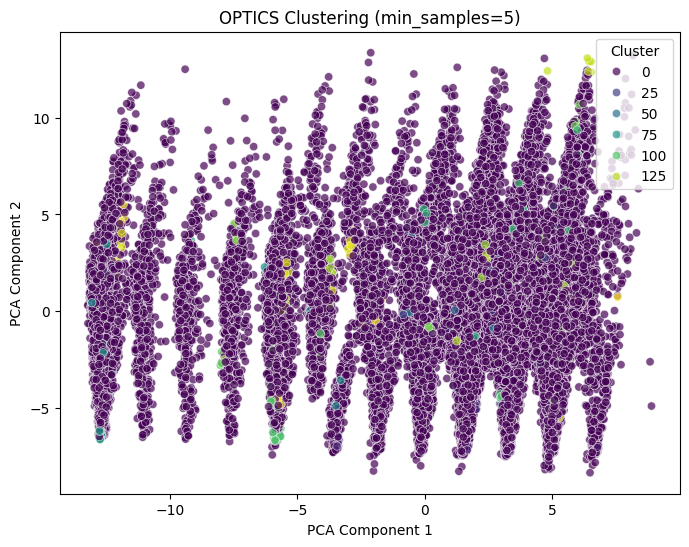

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Assuming df is your DataFrame, and 'binned' is your target column
X = df.drop(columns=['binned'])
# Apply OPTICS clustering
optics = OPTICS(min_samples=5)  # Adjust min_samples as needed
df['OPTICS_Cluster'] = optics.fit_predict(X)
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot OPTICS Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['OPTICS_Cluster'], palette='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"OPTICS Clustering (min_samples={5})")
plt.legend(title="Cluster")
plt.show()
